<a href="https://colab.research.google.com/github/krishnagorrepati/DeepLearningProjects/blob/master/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below model is for training CIFAR-10 dataset which has images of 10 classes. It has 50000 training and 10000 test datasets. Here we use transition blocks ( 1x1convolution and Maxpooling ) between the sequential 3x3 convolutions so that the network see all features better. 

In [0]:
from keras import backend as K   #Impoprting Keras libraries
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10    #Importing CIFAR10 from keras 
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data() # loading the CIFAR10 into train and test variables
num_train, img_channels, img_rows, img_cols =  train_features.shape #Setting number of image channels, coloums, rows
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

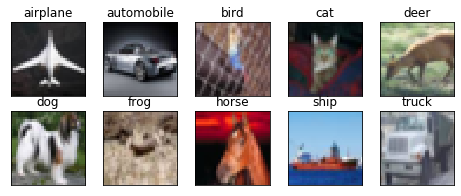

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',  # Plotting 10 images of different classes present in CIFAR10
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):                   #Function to plot the graph of accuracy and loss
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255           #Dividing the train and test data by color range of the image
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model            
# Here Batch Normalization is used after every convolution to highlight the minute gradients and features in the layer and regularization is used to reduce overfitting of the model and
# padding is used alternatively between convolutions to keep the resolution of the feature maps same.Transition layer is used after every 5 or 6 convolutions.

model = Sequential()
model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(512, 3, 3))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu',name='layer'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(64, 2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1))

model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="layer", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/l



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [0]:
from keras.preprocessing.image import ImageDataGenerator # Imagedatagenerator library is used for data augmentation with no horizontal flips

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  if sys.path[0] == '':




Epoch 1/80
390/390 [==============================] - 172s 441ms/step - loss: 1.9645 - acc: 0.2889 - val_loss: 1.7080 - val_acc: 0.3869
Epoch 2/80
390/390 [==============================] - 160s 411ms/step - loss: 1.5416 - acc: 0.4274 - val_loss: 1.5905 - val_acc: 0.4399
Epoch 3/80
390/390 [==============================] - 160s 410ms/step - loss: 1.3330 - acc: 0.5207 - val_loss: 1.3016 - val_acc: 0.5499
Epoch 4/80
390/390 [==============================] - 160s 410ms/step - loss: 1.1886 - acc: 0.5751 - val_loss: 1.1971 - val_acc: 0.5810
Epoch 5/80
390/390 [==============================] - 160s 410ms/step - loss: 1.0817 - acc: 0.6159 - val_loss: 1.1093 - val_acc: 0.6160
Epoch 6/80
390/390 [==============================] - 160s 410ms/step - loss: 1.0010 - acc: 0.6443 - val_loss: 1.0462 - val_acc: 0.6353
Epoch 7/80
390/390 [==============================] - 160s 410ms/step - loss: 0.9402 - acc: 0.6675 - val_loss: 0.9633 - val_acc: 0.6721
Epoch 8/80
390/390 [==========================

NameError: ignored

Model took 13080.15 seconds to train


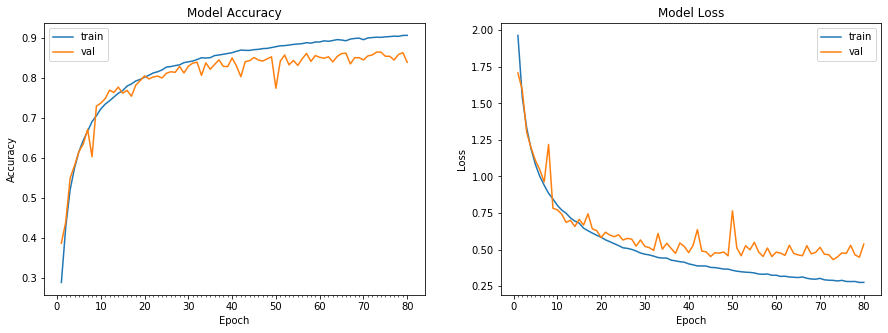

Accuracy on test data is: 83.96


In [0]:
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model.save('Assignment 9.h5')
model_file = drive.CreateFile({'title' : 'Assignment 9.h5'})                       
model_file.SetContentFile('Assignment 9.h5')                      
model_file.Upload()
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1naC1Fd1q6N07AfktTZa76cxTJltTTNAu'})

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)
file_obj = drive.CreateFile({'id': '1naC1Fd1q6N07AfktTZa76cxTJltTTNAu'})                       
file_obj.GetContentFile('Assignment 9.h5')

In [0]:
from numpy import loadtxt
from keras.models import load_model
model = load_model('Assignment 9.h5')

In [0]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
test_features[0].shape

(32, 32, 3)

**Implementing GradCam**

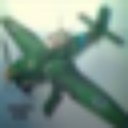

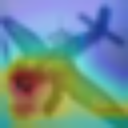

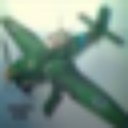

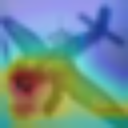

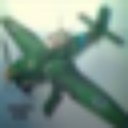

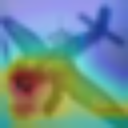

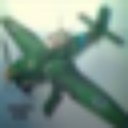

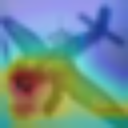

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',  # Plotting 10 images of different classes present in CIFAR10
               'dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
gradcam_test_features= [ test_features[14], test_features[17], test_features[22], test_features[27]]
for idx in range(4):
  img=gradcam_test_features[idx]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("layer")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(4):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    Original_img=new_image=cv2.resize(img,(128,128))
    cv2_imshow(Original_img)
    superimposed_img=cv2.resize(superimposed_img,(128,128))
    cv2_imshow(superimposed_img)

**Implementing CutOut**

In [0]:
import numpy as np



def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=30)`
  if sys.path[0] == '':


Epoch 1/30
390/390 [==============================] - 170s 436ms/step - loss: 0.5122 - acc: 0.8274 - val_loss: 0.4850 - val_acc: 0.8432
Epoch 2/30
390/390 [==============================] - 160s 411ms/step - loss: 0.4674 - acc: 0.8412 - val_loss: 0.4550 - val_acc: 0.8553
Epoch 3/30
390/390 [==============================] - 160s 411ms/step - loss: 0.4597 - acc: 0.8432 - val_loss: 0.4402 - val_acc: 0.8579
Epoch 4/30
390/390 [==============================] - 159s 409ms/step - loss: 0.4493 - acc: 0.8474 - val_loss: 0.4296 - val_acc: 0.8650
Epoch 5/30
390/390 [==============================] - 160s 410ms/step - loss: 0.4438 - acc: 0.8495 - val_loss: 0.4300 - val_acc: 0.8654
Epoch 6/30
390/390 [==============================] - 160s 410ms/step - loss: 0.4416 - acc: 0.8511 - val_loss: 0.4571 - val_acc: 0.8591
Epoch 7/30
390/390 [==============================] - 160s 409ms/step - loss: 0.4357 - acc: 0.8530 - val_loss: 0.4568 - val_acc: 0.8566
Epoch 8/30
390/390 [============================

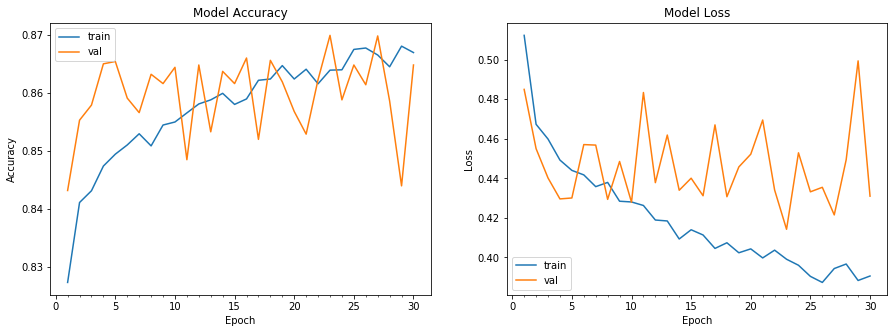

Accuracy on test data is: 86.48


In [0]:
from keras.preprocessing.image import ImageDataGenerator # Imagedatagenerator library is used for data augmentation with no horizontal flips

datagen = ImageDataGenerator(
    preprocessing_function=get_random_eraser(v_l=0, v_h=1))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Accuracy increased from 83.96 to 86.48 avfter using CutOut**

**Implementing GradCam after CutOut**

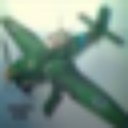

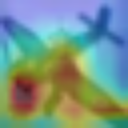

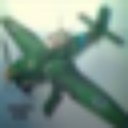

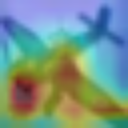

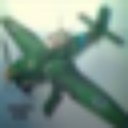

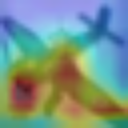

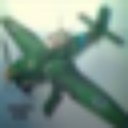

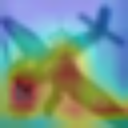

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',  # Plotting 10 images of different classes present in CIFAR10
               'dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
gradcam_test_features= [ test_features[14], test_features[17], test_features[22], test_features[27]]
for idx in range(4):
  img=gradcam_test_features[idx]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("layer")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(4):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    Original_img=new_image=cv2.resize(img,(128,128))
    cv2_imshow(Original_img)
    superimposed_img=cv2.resize(superimposed_img,(128,128))
    cv2_imshow(superimposed_img)